In [2]:
# Importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.utils import shuffle

In [3]:
# Now, we'll read the datasets
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

In [4]:
# Print out the "shape" of each set (rows, columbs) first we'll do the fake one
fake.shape

(23481, 4)

In [5]:
# Print out the "shape" of the true set (rows, columns)
true.shape

(21417, 4)

In [6]:
# We'll add a flag so that we know what is fake and what is true once we start diving deeper into analysis
# This also allows us to combine the two datasets without fear of not being able to tell them apart!
fake['target'] = 'fake'
true['target'] = 'true'

In [7]:
# Now we'll combine the two sets or "Concatenate" them
data = pd.concat([fake, true]).reset_index(drop = True) # this does the combining creating a data frame using pandas
data.shape # this prints the shape of the new dataframe (rows, columns)

(44898, 5)

In [8]:
# Shuffling the data helps prevent bias by taking them out of order
data = shuffle(data)
data = data.reset_index(drop=True)

In [9]:
# Make sure the data is looking good.
# We should see the title, some of the body, the subject assigned, the datee, and the true/false designation
data.head()

,title,text,subject,date,target
0,SHOCKER! A LIBERAL TAKEDOWN Of Hillary Clinton...,,politics,"Sep 26, 2016",fake
1,"Syria army, U.S.-backed forces converge on Isl...",BEIRUT (Reuters) - Syrian government forces an...,worldnews,"September 10, 2017",true
2,New York attorney general says will sue over O...,(Reuters) - New York state Attorney General Er...,politicsNews,"July 17, 2017",true
3,UK Brexit campaign probed over possible breach...,LONDON (Reuters) - Britain s Electoral Commiss...,worldnews,"November 20, 2017",true
4,Two Florida nuclear plants likely to shut if I...,WASHINGTON (Reuters) - Energy firm Florida Pow...,worldnews,"September 6, 2017",true


In [10]:
# We'll remove the date for now
data.drop(["date"], axis=1, inplace=True)
data.head() # check to ensure the date removed

,title,text,subject,target
0,SHOCKER! A LIBERAL TAKEDOWN Of Hillary Clinton...,,politics,fake
1,"Syria army, U.S.-backed forces converge on Isl...",BEIRUT (Reuters) - Syrian government forces an...,worldnews,true
2,New York attorney general says will sue over O...,(Reuters) - New York state Attorney General Er...,politicsNews,true
3,UK Brexit campaign probed over possible breach...,LONDON (Reuters) - Britain s Electoral Commiss...,worldnews,true
4,Two Florida nuclear plants likely to shut if I...,WASHINGTON (Reuters) - Energy firm Florida Pow...,worldnews,true


In [11]:
# Remove the title now
data.drop(["title"], axis=1, inplace=True)
data.head() # check data to make sure it did it

,text,subject,target
0,,politics,fake
1,BEIRUT (Reuters) - Syrian government forces an...,worldnews,true
2,(Reuters) - New York state Attorney General Er...,politicsNews,true
3,LONDON (Reuters) - Britain s Electoral Commiss...,worldnews,true
4,WASHINGTON (Reuters) - Energy firm Florida Pow...,worldnews,true


In [12]:
# Convert all text to lowercase just to make life easier
data['text'] = data['text'].apply(lambda x: x.lower())
data.head() # checking once again

,text,subject,target
0,,politics,fake
1,beirut (reuters) - syrian government forces an...,worldnews,true
2,(reuters) - new york state attorney general er...,politicsNews,true
3,london (reuters) - britain s electoral commiss...,worldnews,true
4,washington (reuters) - energy firm florida pow...,worldnews,true


In [13]:
# Remove punctuation too
import string

# this function removes the punctuation lets walkthrough it
def punctuation_removal(text): # typical syntax here
    # the line below takes the body of text and looks for characters that are in the text but not in a string i.e. punctuation
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list) # cleans string and rejoins it
    return clean_str # returns the newly cleaned text

data['text'] = data['text'].apply(punctuation_removal) # redefines our text as the new cleaned text

In [14]:
# lets do another check since we did a whole function
data.head()

,text,subject,target
0,,politics,fake
1,beirut reuters syrian government forces and u...,worldnews,true
2,reuters new york state attorney general eric ...,politicsNews,true
3,london reuters britain s electoral commission...,worldnews,true
4,washington reuters energy firm florida power ...,worldnews,true


In [15]:
# Get rid of stopwords now
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to C:\Users\Alex
[nltk_data]     Anderson\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
data.head()

,text,subject,target
0,,politics,fake
1,beirut reuters syrian government forces usback...,worldnews,true
2,reuters new york state attorney general eric s...,politicsNews,true
3,london reuters britain electoral commission op...,worldnews,true
4,washington reuters energy firm florida power l...,worldnews,true


In [28]:
# Now that we've properly cleaned the data, lets do some stuff with it

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


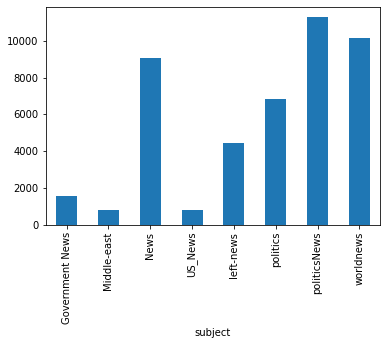

In [18]:
# Lets see how many articles there are per subject of our entire dataset both true and false
print(data.groupby(['subject'])['text'].count()) # prints the table above the group
data.groupby(['subject'])['text'].count().plot(kind="bar") # creates a bar graph with the data
plt.show() # prints the graph

target
fake    23481
true    21417
Name: text, dtype: int64


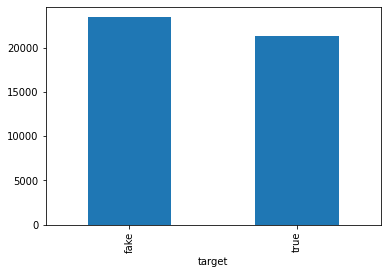

In [19]:
# lets compare the quantity of true and false articles
print(data.groupby(['target'])['text'].count()) # creates table above chart
data.groupby(['target'])['text'].count().plot(kind="bar") # creates bar graph
plt.show() # prints graph

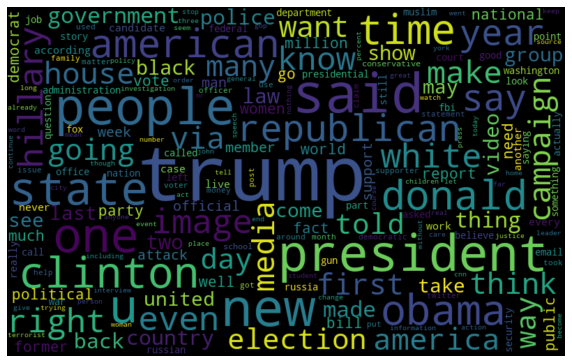

In [20]:
# lets make a word cloud for the fake news
from wordcloud import WordCloud # imports the necessary package

fake_data = data[data["target"] == "fake"] # brings the data we want in (fake news text)
all_words = ' '.join([text for text in fake_data.text]) # uses all words in the fake data

wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110, # creates wordcloud graphic
                     collocations = False).generate(all_words)
plt.figure(figsize=(10,7)) # defines figure size
plt.imshow(wordcloud, interpolation='bilinear') # options for wordcloud graphic
plt.axis("off") # turns off the axis
plt.show() # prints the graphic

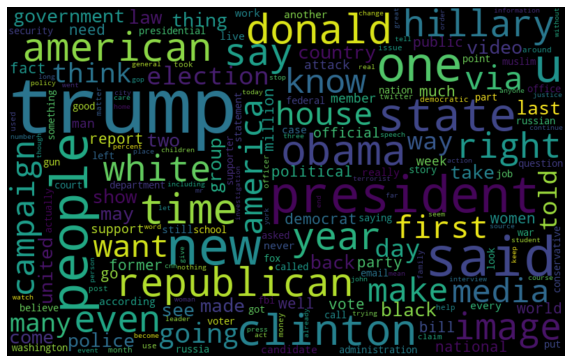

In [21]:
# word cloud for real news
from wordcloud import WordCloud # imports wordcloud package

real_data = data[data["target"] == "true"] # brings in the real news data we want
all_words= ' '.join([text for text in fake_data.text]) # uses all the text

wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110, # creates the wordcloud graphic
                     collocations = False).generate(all_words)
plt.figure(figsize=(10,7)) # makes the figure and defines the size
plt.imshow(wordcloud, interpolation='bilinear') # options for wordcloud
plt.axis("off") # turns off the axis
plt.show() # prints the graphic

In [22]:
# Most frequent words counter
from nltk import tokenize # import the right package

token_space = tokenize.WhitespaceTokenizer()

# creating a "counter" function to use for counting the most frequency words
def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = "red")
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

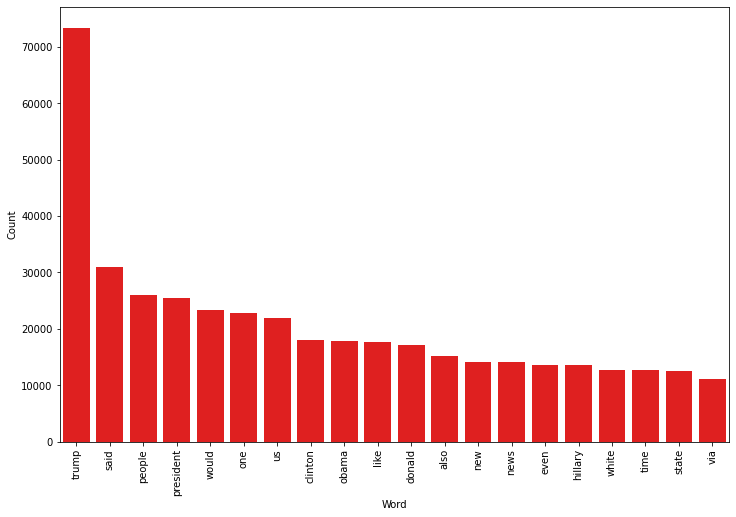

In [23]:
# Using counter function we just created to count most frequeny words in fake news
counter(data[data["target"] == "fake"], "text", 20)

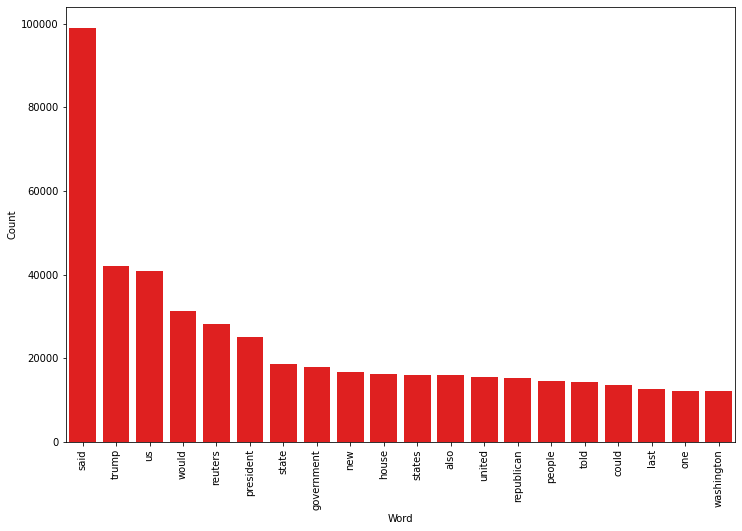

In [24]:
# Using counter function to count most frequent words in real news
counter(data[data["target"] == "true"], "text", 20)

In [25]:
# From here on out, we will use the analytics we have gathered about this dataset to apply some
#   machine learning models and see what we get!

In [26]:
# Function to plot the confusion matrix
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes, normalize=False,
                         title='Confusion Matrix',
                         cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix, Without Normalization")
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i,j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [27]:
# Preparing the data for the models now!

In [29]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(data["text"], data.target,
                                                   test_size=0.2, random_state=42)

In [30]:
# Logistic Regression Model

In [31]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("Accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

Accuracy: 98.86%


Confusion Matrix, Without Normalization


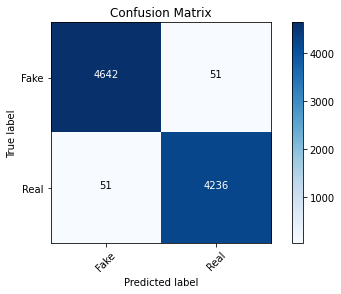

In [32]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake','Real'])

In [33]:
# Decision Tree Classifier Model

In [34]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
piple = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion = 'entropy', max_depth = 20,
                                                 splitter = 'best',
                                                 random_state = 42))])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("Accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

Accuracy: 98.86%


Confusion Matrix, Without Normalization


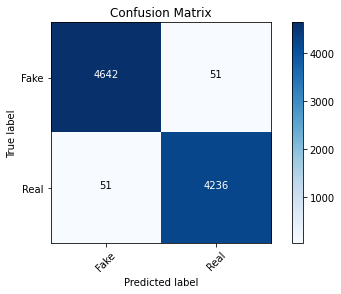

In [35]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake','Real'])

In [36]:
# Random Forest Classifier Model

In [37]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vert', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("Accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

Accuracy: 98.95%


Confusion Matrix, Without Normalization


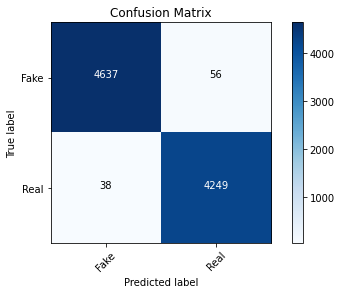

In [38]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake','Real'])